Baseline for predicting filtered shear stress (Autoregressive average methods)

In [1]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import statistics
from sklearn.model_selection import train_test_split
#from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Load the data

data = loadmat('/content/drive/My Drive/Colab Notebooks/Labquake_prediction/MLpreprocessed_code/data/p5270_ML_Master.mat')

m_t = pd.DataFrame({'Time':data['Time'].ravel().round(2), 'SS':data['SS'].ravel()})    # TTF and TSF not used
a_t = pd.DataFrame({'Time':data['LocalAcTime'].ravel().round(2), 'A_filt':data['A_filt'].ravel(), 'V_filt':data['V_filt'].ravel(),
                    'T_pc':data['T_pc'].ravel(), 'Vel_pc':data['Vel_pc'].ravel(), 'T_der':data['T_der'].ravel(), 'Vel_der':data['Vel_der'].ravel()})
                   # 'T_off':data['T_off'].ravel(), 'Vel_off':data['Vel_off'].ravel()})    # 8 features

df = a_t.merge(m_t, on='Time')

xdf = df.drop(['SS'], axis=1)
ydf = df['SS']

print(xdf.shape)
print(ydf.shape)

(132399, 7)
(132399,)


In [3]:

# Split into train-test
x_train, x_test, y_train, y_test = train_test_split(xdf, ydf, test_size=0.3, shuffle=False)

# Autoregression Models

  # Average method
y_pred_avg = np.full(len(y_test), np.mean(y_train))
r2_avg = r2_score(y_test, y_pred_avg)
rmse_avg = np.sqrt(mean_squared_error(y_test, y_pred_avg))
  
  # Rolling average method
y_pred_rolling_avg = np.full(len(y_test), pd.DataFrame(y_train).rolling(380).mean().iloc[-1])
r2_rolling_avg = r2_score(y_test, y_pred_rolling_avg)
rmse_rolling_avg = np.sqrt(mean_squared_error(y_test, y_pred_rolling_avg))

  # Naive forecast method
y_pred_naive = np.full(len(y_test), y_train[len(y_train)-1])
r2_naive = r2_score(y_test, y_pred_naive)
rmse_naive = np.sqrt(mean_squared_error(y_test, y_pred_naive))

'''
  # ARIMA 
model2 = ARMA(y_train, order=(2,1)).fit(disp=0)
y_pred_arima = model2.predict(start=y_test.index[0], end=y_test.index[-1])
r2_arima = r2_score(y_test, y_pred_arima)
rmse_arima = np.sqrt(mean_squared_error(y_test, y_pred_arima))
'''

print("1. AVERAGE METHOD: \nRMSE: ", rmse_avg, "\nR2 score: ", r2_avg)
print("\n2. ROLLING AVERAGE METHOD: \nRMSE: ", rmse_rolling_avg, "\nR2 score: ", r2_rolling_avg)
print("\n3. NAIVE FORECAST METHOD: \nRMSE: ", rmse_naive, "\nR2 score: ", r2_naive)
#print("\n4. ARMA METHOD: \nRMSE: ", rmse_arima, "\nR2 score: ", r2_arima)


1. AVERAGE METHOD: 
RMSE:  0.1528279645439568 
R2 score:  -0.10208907064510098

2. ROLLING AVERAGE METHOD: 
RMSE:  0.14560225291825854 
R2 score:  -0.0003390612175022678

3. NAIVE FORECAST METHOD: 
RMSE:  0.18396954962246279 
R2 score:  -0.5969926889736037


Text(0.5, 1.0, 'Test data')

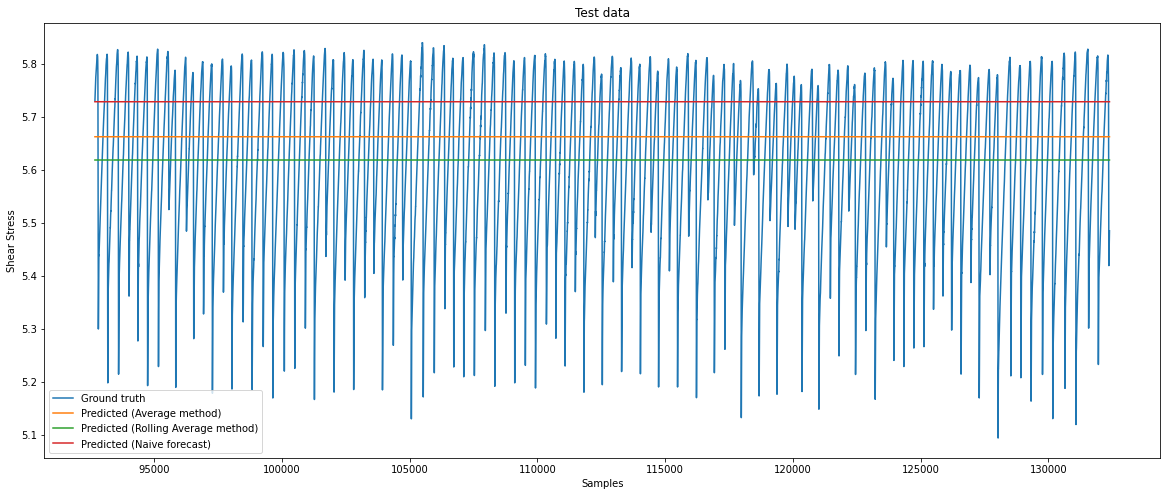

In [4]:
  # Plot
  
  fig = plt.figure(1, figsize=(20,8))
  plt.plot(y_test.index, y_test)
  plt.plot(y_test.index, y_pred_avg)
  plt.plot(y_test.index, y_pred_rolling_avg)
  plt.plot(y_test.index, y_pred_naive)
  #plt.plot(test_index, y_pred_arima)
  plt.xlabel('Samples')
  plt.ylabel('Shear Stress')
  plt.legend(['Ground truth', 'Predicted (Average method)', 'Predicted (Rolling Average method)', 'Predicted (Naive forecast)'
              #,'Predicted (ARMA)'
              ])
  plt.title('Test data')